<a href="https://colab.research.google.com/github/pallavrouth/MarketingAnalytics/blob/main/Predictive_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Smart Pricing

https://www.airbnb.com/help/article/1168

# What is machine learning?

Machine learning is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computer systems to improve their performance on a specific task through learning from data. In essence, it's about creating systems that can learn and make predictions or decisions based on data without being explicitly programmed to perform a specific task.

Machine learning involves training models on large datasets and using statistical techniques to enable the models to recognize patterns, make predictions, and generalize from the data they've been exposed to.




## Machine Learning and Making Predictions

**Prediction versus inference**

Prediction involves using a statistical model to make forecasts or estimates about future or unseen data points. It is typically used when the goal is to make informed guesses or projections about what might happen. It is generally used to answer questions such as -

1. Can we predict a response given some predictors?
2. How can we accurately make a prediction of a response given some predictors?

Inference involves drawing conclusions or making inferences about a population or a process based on a sample of data. It is used to understand the associations between variables. Inference is typically used to test hypothesis testing related to these associations. It is used to answer questions such as -

1. Which predictors are associated with the response?
2. What is the nature relationship between the response and each predictor?

**Usefulness in marketing analytics**

Prediction is particularly useful for a variety of tasks in marketing analytics. For example, predicting which customers are at risk of churning (leaving a product or service) is essential for customer retention. By analyzing past customer behavior and engagement metrics, companies can identify customers who are likely to churn and implement targeted retention strategies. Another example is analyzing historical data, predictive models can automatically segment customers into different groups based on their characteristics and behavior. These segments can be used for targeted marketing campaigns and personalized messaging.

# Types of machine learning

1. **Supervised Learning:** In this type of learning, the model is trained on a labeled dataset, meaning it learns from data where the desired output is known. The model generalizes from this training to make predictions or classifications on new, unseen data.

2. **Unsupervised Learning:** Unsupervised learning involves working with unlabeled data. The goal is to discover patterns, structures, or clusters in the data without explicit guidance. Common techniques in unsupervised learning include clustering and dimensionality reduction.

## Unsupervised machine learning: Clustering

**Principles of clustering algorithms**

Clustering is a type of unsupervised machine learning technique that aims to group similar data points together into clusters or subgroups without knowing the prior groups. Consider a social setting where there are groups of people having discussions in different circles around a room. When you first look at the room, you just see a group of people. You could mentally start placing points in the center of each group of people and name that point as a unique identifier. You would then be able to refer to each group by a unique name to describe them. This is essentially what k-means clustering does with data.


The principles of clustering algorithms are as follows:

1. **Similarity Measurement:** Clustering algorithms rely on a similarity or distance metric to determine how similar or dissimilar data points are. Common distance metrics include Euclidean distance, Manhattan distance, and cosine similarity.
2. **Grouping by Similarity:** The fundamental principle of clustering is to group data points that are more similar to each other into the same cluster. This is achieved by minimizing the intra-cluster distance and maximizing the inter-cluster distance.
3. **Centroid or Prototype:** Many clustering algorithms use a centroid or prototype approach, where a central point represents each cluster. Data points are assigned to the cluster whose centroid is closest to them.


**Types of clustering algorithms**

There are several types of clustering algorithms, each with its own approach and characteristics. We will focus on two of them -

1. **K-Means Clustering:** K-Means is a partitioning algorithm that divides data into a predefined number of clusters (K). It minimizes the sum of squared distances between data points and the cluster centroids.

2. **Hierarchical Clustering:** This type of clustering creates a hierarchy of clusters, starting with individual data points and merging them into larger clusters in a tree-like structure. Agglomerative and divisive methods are two common approaches.

**Hierarchical clustering vs K Means clustering**

Unlike Hierarchical clustering, K-means clustering seeks to partition the original data points into “K” groups or clusters where the user specifies “K” in advance.

The general idea is to look for clusters that minimize the squared Euclidean distance of all the points from the centers over all attributes (variables or features) and merge those individuals in an iterative manner.

It is less flexible than hierarchical clustering because it constrains the user to specify the number of clusters beforehand, which may not be obvious in some situations.

The result is not stable and changes from one iteration to another for the same data set.
It is more sensitive to outliers because the use of outliers in the data impacts the mean of the cluster.

Both k-means and hierarchical clustering are **incapable of handling categorical data directly** and may not work well with data that is not continuous or has very large variance.

## Clustering applications in marketing analytics: Customer segmentation

**What is customer segmentation**

Customer segmentation in marketing is the process of dividing a company's customer base into distinct and homogenous groups based on certain characteristics, behaviors, or attributes. The purpose of customer segmentation is to better understand and target different customer groups with tailored marketing strategies and messages.

Here are some key aspects of customer segmentation in marketing:

1. **Segmentation Variables:** Customer segmentation can be based on various variables, including demographics (age, gender, income), psychographics (lifestyle, values), geographic location, behavioral traits (purchase history, website activity), and more. Often, a combination of these variables is used to create comprehensive customer segments.
2. **Benefits:**
  1. Targeted Marketing: Segmentation allows businesses to create marketing campaigns that specifically address the needs and preferences of each segment, increasing the effectiveness of their efforts.
Personalization: Tailored messages and offers resonate more with customers, leading to higher engagement and conversion rates.
  2. Resource Allocation: Companies can allocate their marketing resources more efficiently by focusing on the most promising customer segments.
Product Development: Understanding customer segments can guide product or service development to meet the unique needs of different customer groups.


In [ ]:
import pandas as pd

segmentation_data = pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/subscription.csv', index_col = 'Unnamed: 0')
segmentation_data.head()
segmentation_data.Segment.value_counts()
segmentation_data.columns

Index(['Segment', 'age', 'gender', 'income', 'kids', 'own_home', 'subscribe'], dtype='object')

In [ ]:
segmentation_data.groupby(["Segment"]).agg(mean_age = ('age','mean'),
                                           mean_income = ('income','mean'),
                                           mean_kids = ('kids','mean'),
                                           mean_home = ('own_home','mean'),
                                           sum_subs = ('subscribe','sum'))

,mean_age,mean_income,mean_kids,mean_home,sum_subs
Segment,,,,,
moving_up,36.216087,51763.552666,1.857143,0.357143,15
suburb_mix,39.284730,55552.282925,1.950000,0.480000,7
travelers,57.746500,62609.655328,0.000000,0.662500,2
urban_hip,23.873716,20267.737317,1.140000,0.140000,11


In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 4)
kmeans.fit(segmentation_data.loc[:,['age','income','kids','own_home']])
labels = kmeans.labels_

segmentation_data_with_labels = segmentation_data.assign(labels = labels)
segmentation_data_with_labels.groupby(["labels"]).agg(mean_age = ('age','mean'),
                                                      mean_income = ('income','mean'),
                                                      mean_kids = ('kids','mean'),
                                                      mean_home = ('own_home','mean'),
                                                      sum_subs = ('subscribe','sum'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,mean_age,mean_income,mean_kids,mean_home,sum_subs
labels,,,,,
0,52.117381,81545.927332,0.476190,0.571429,1
1,41.993915,45566.356272,1.373832,0.532710,14
2,27.809087,20457.938690,1.072727,0.163636,11
3,42.346106,60157.505981,1.625000,0.447917,9


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_standardized = scaler.fit_transform(segmentation_data.loc[:,['age','income','kids','own_home']])
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_standardized)

segmentation_data_with_labels = segmentation_data.assign(labels = kmeans.labels_)
segmentation_data_with_labels.groupby(["labels"]).agg(mean_age = ('age','mean'),
                                                      mean_income = ('income','mean'),
                                                      mean_kids = ('kids','mean'),
                                                      mean_home = ('own_home','mean'),
                                                      sum_subs = ('subscribe','sum'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,mean_age,mean_income,mean_kids,mean_home,sum_subs
labels,,,,,
0,37.430767,53156.476256,1.942857,1.000000,7
1,38.242040,55033.178368,1.947368,0.000000,14
2,57.846066,63086.382333,0.024691,0.691358,3
3,24.783818,21143.222579,1.092593,0.129630,11


In [ ]:
from plotnine import (
    ggplot,
    aes,
    geom_histogram,
    geom_rug,
    geom_bar,
    coord_flip,
    after_stat,
    geom_boxplot,
    geom_violin,
    geom_point,
    geom_line,
    geom_tile,
    facet_wrap
)

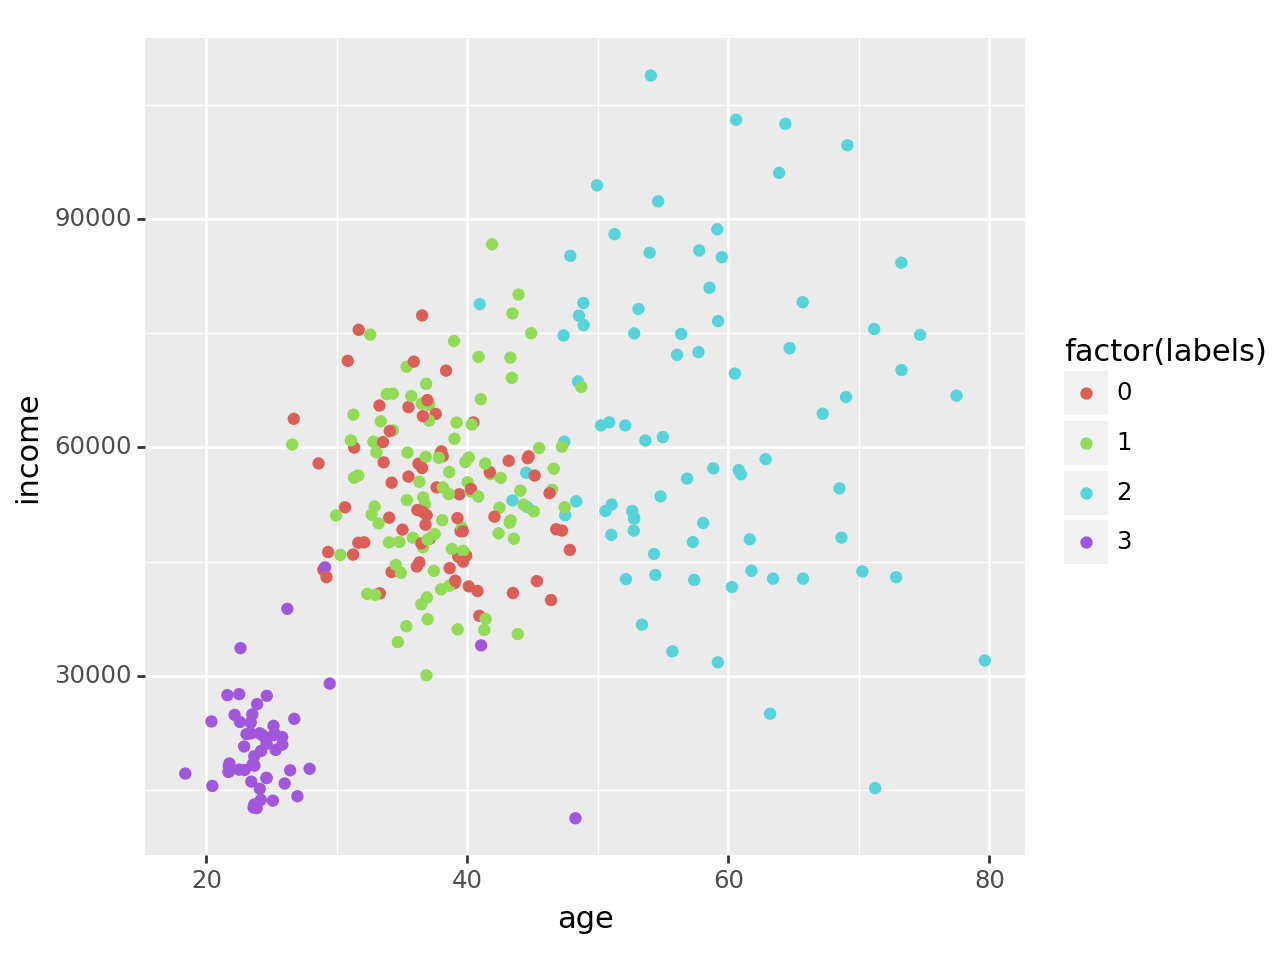

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(segmentation_data_with_labels, aes(x = 'age', y = 'income', color = 'factor(labels)')) +
      geom_point()
)

We can evaluate performance of the clustering algorithm using a **Silhouette score** which is a part of sklearn.metrics where a **lower score** represents a better fit.

It provides a measure of how similar each data point in one cluster is to the data points in the same cluster compared to the nearest neighboring cluster. The silhouette score ranges from -1 to 1, and a higher score indicates that the clusters are well separated and appropriately assigned.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data_standardized, kmeans.labels_, metric = 'euclidean')

0.3410499900623041

Since we have not looked at the strength of different numbers of clusters, we do not know how good of a fit the k = 3 model is.

In [ ]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_standardized)
    fits.append(model)
    score.append(silhouette_score(data_standardized, model.labels_, metric = 'euclidean'))

Typically, as we increase the value of K, we see improvements in clusters and what they represent until a certain point. We then start to see diminishing returns or even worse performance.

We can visually see this to help make a decision on the value of k by using an elbow plot where the y-axis is a measure of goodness of fit and the x-axis is the value of k.

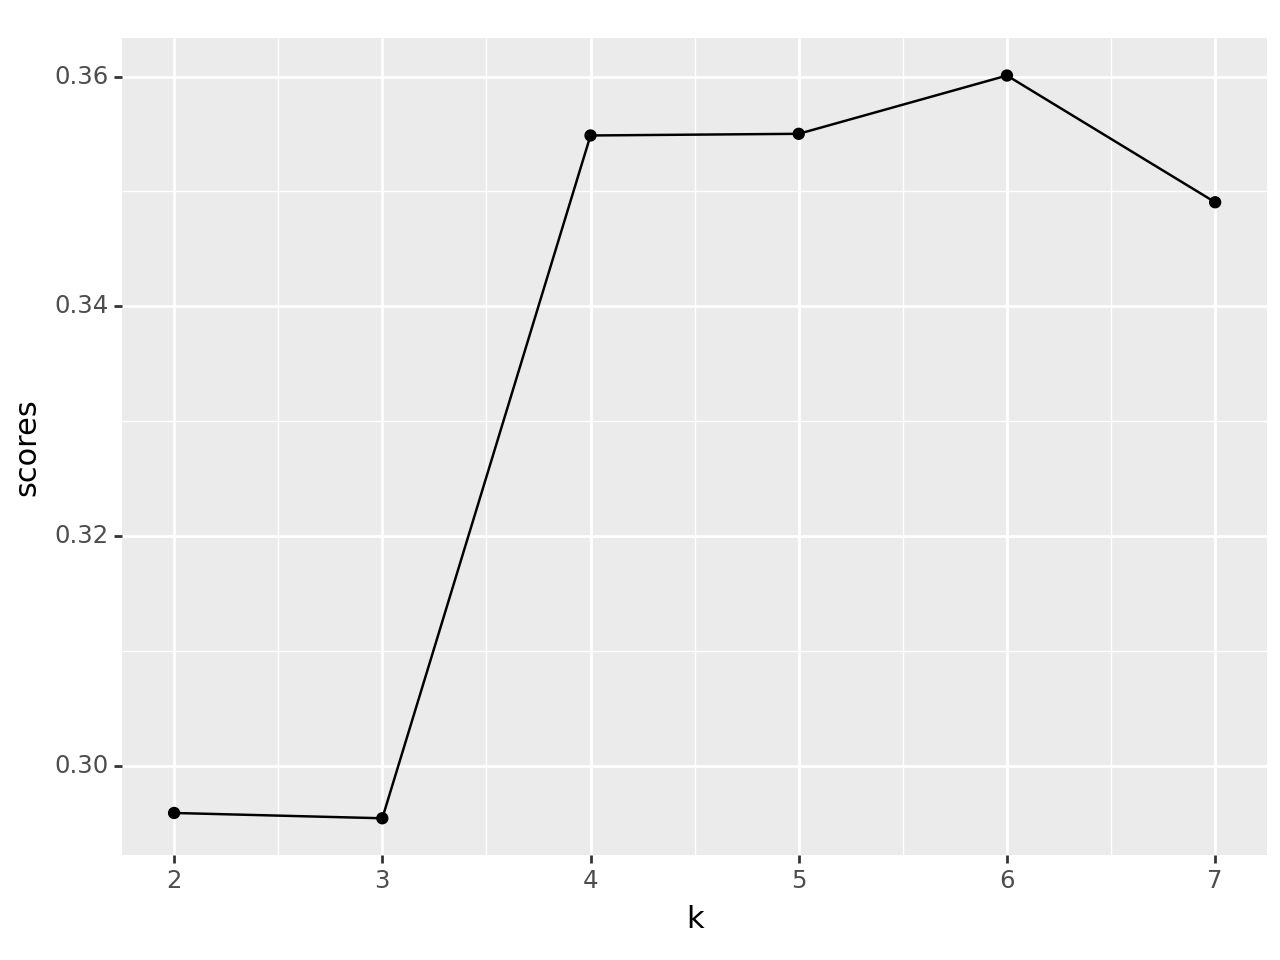

<Figure Size: (640 x 480)>

In [ ]:
plot_data = pd.DataFrame({'k' : list(K), 'scores' : score})

(
    ggplot(plot_data, aes(x = 'k', y = 'scores')) +
      geom_point() +
      geom_line()
)

In [ ]:
transactions = pd.read_csv("https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/transaction_transactions.csv", index_col = False)
transactions.head()

In [ ]:
rfm = (
    transactions
      .loc[:,["customer_id","transaction_date","list_price"]]
      .assign(transaction_date = lambda d: pd.to_datetime(d.transaction_date, format = "%d/%m/%Y"))
      .groupby(["customer_id"], as_index = False)
        .agg(frequency = ('transaction_date','nunique'),
             moneytary_value = ('list_price','sum'),
             last_transaction_date = ('transaction_date','last'))
        .assign(recency = lambda d: (pd.to_datetime('2017-12-31') - d.last_transaction_date),
                recency_int = lambda d: d.recency.dt.days)
)

rfm

,customer_id,frequency,moneytary_value,last_transaction_date,recency,recency_int
0,1,11,9084.45,2017-03-29,277 days,277
1,2,3,4149.07,2017-08-24,129 days,129
2,3,8,9888.23,2017-09-19,103 days,103
3,4,2,1047.72,2017-06-18,196 days,196
4,5,6,5903.20,2017-04-28,247 days,247
...,...,...,...,...,...,...
3489,3497,3,3744.07,2017-09-12,110 days,110
3490,3498,6,5177.06,2017-02-10,324 days,324
3491,3499,7,7673.48,2017-11-09,52 days,52
3492,3500,6,4922.41,2017-03-14,292 days,292


In [ ]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(rfm.loc[:,['frequency','moneytary_value','recency_int']])
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=3)

In [ ]:
rfm_data_with_labels = rfm.assign(labels = kmeans.labels_)
rfm_data_with_labels
rfm_data_with_labels.labels.value_counts()

0    1265
2    1162
1    1067
Name: labels, dtype: int64

In [ ]:
rfm_data_with_labels.groupby(["labels"]).agg(mean_frequency = ('frequency','mean'),
                                             mean_recency = ('recency_int','mean'),
                                             mean_mvalue = ('moneytary_value','mean'))

,mean_frequency,mean_recency,mean_mvalue
labels,,,
0,4.443478,92.242688,4718.384134
1,8.309278,174.930647,9767.253880
2,4.630809,281.397590,4962.283270


In [ ]:
merged_data = (
    transactions.merge(rfm_data_with_labels, how = 'inner', on = 'customer_id')
)

merged_data.groupby(['labels','brand'], as_index = False).agg(sum_brands = ('transaction_date','nunique'))
merged_data.groupby(['labels','product_class'], as_index = False).agg(sum_brands = ('transaction_date','nunique'))
merged_data.groupby(['labels','product_line'], as_index = False).agg(sum_brands = ('transaction_date','nunique'))

,labels,product_line,sum_brands
0,0,Mountain,116
1,0,Road,349
2,0,Standard,363
3,0,Touring,218
4,1,Mountain,132
5,1,Road,363
6,1,Standard,364
7,1,Touring,290
8,2,Mountain,94
9,2,Road,349


## Agglomerative clustering

Agglomerative clustering is a hierarchical clustering technique in machine learning and data analysis. It is a **"bottom-up" approach**, starting with each data point as a single cluster and iteratively merging clusters until a stopping criterion is met. The result is a hierarchical tree-like structure known as a **dendrogram**, which shows the order and structure of cluster merging. Agglomerative clustering is often used in exploratory data analysis and can help identify hierarchical relationships within the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(segmentation_data.loc[:, ['age','income']], method = 'ward')
plt.figure(figsize = (10,5))
dendrogram(Z, labels = segmentation_data.index, leaf_font_size = 0.5, orientation = "top")
plt.xlabel("Data Points")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.xlabel("")
plt.title('Dendrogram')
plt.show()

**Interpreting a dendogram**

In [ ]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
agg_clustering.fit(segmentation_data.loc[:,['age','income','kids','own_home']])


Here

1. **n_clusters:** Specifies the number of clusters to create.
2. **affinity:** Specifies the distance metric (Euclidean distance) used to calculate the similarity between data points.
3. **linkage:** Specifies the method (Ward's method) used to calculate the distance between clusters during the hierarchical clustering process.

In [ ]:
segmentation_data_with_labels = segmentation_data.assign(labels = agg_clustering.labels_)
segmentation_data_with_labels.groupby(["labels"]).agg(mean_age = ('age','mean'),
                                                      mean_income = ('income','mean'),
                                                      mean_kids = ('kids','mean'),
                                                      mean_home = ('own_home','mean'),
                                                      sum_subs = ('subscribe','sum'))

## Unsupervised machine learning: PCA

When faced with **a large set of correlated variables**, Principal Component Analysis (PCA) allow us to summarize the large number of variables with a **smaller number of representative variables** that collectively explain most of the variability in the original set. Therefore PCA is a linear **dimensionality reduction technique** because it is utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. One important thing to note about PCA is that it is an unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

An important step in PCA is to compute **principal components**, and then subsequently using of these components in understanding the data. Important aspects of principle components:

1. Each principle components is essentially a linear combination of independent variables or input variable or feature variables.
2. Each principal component represents a percentage of total variation captured from the data.

## PCA applications in marketing analytics: Survey methods

PCA (Principal Component Analysis) can be a valuable technique used in **survey methods**, especially in the context of discovering and **understanding underlying constructs or latent variables**.

Surveys often involve collecting data on specific domains such as customer satisfaction, employee engagement, or other psychological traits that provide insight into consumer behavior. These surveys can lead to high-dimensional datasets because they are composed of multiple survey questions. PCA can help by reducing the dimensionality of the survey data.  

The principal components obtained through PCA on survey data can often be **interpreted as underlying constructs** or latent variables. These constructs can be seen as representing multiple (correlated) survey questions. This helps reduce the complexity of analysis because there are fewer variables to deal with. An analyst can use the principle components to perform further analysis to further understand the data.

For example, in a customer satisfaction survey, the first principal component (PC1) composed of several survey questions might represent service, and the second principal component (PC2) composed of some other survey questions might represent customer engagement. Then the analyst can visualize a scatter plot of PC1 versus PC2 as a way to visualize the relationship between customer service and customer engagement.

**Approach**

Each principal component is accompanied by **factor loadings**. Intuitively, factor loading allow you to understand which input variable or feature are a part of which principle component. By examining the factor loadings of the original items on each principal component, you can identify the questions contributing most to each construct.

**Analysis**

In [ ]:
brand_rating = pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/brandrating.csv')
brand_rating.head()

,Unnamed: 0,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,0,2,4,8,8,2,9,7,4,6,a
1,1,1,1,4,7,1,1,1,2,2,a
2,2,2,3,5,9,2,9,5,1,6,a
3,3,1,6,10,8,3,4,5,2,1,a
4,4,1,1,5,8,1,9,9,1,1,a


In [ ]:
numerical_data = brand_rating.iloc[:, 1:10]
numerical_data

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,2,4,8,8,2,9,7,4,6
1,1,1,4,7,1,1,1,2,2
2,2,3,5,9,2,9,5,1,6
3,1,6,10,8,3,4,5,2,1
4,1,1,5,8,1,9,9,1,1
...,...,...,...,...,...,...,...,...,...
995,2,2,3,6,4,8,5,1,2
996,3,2,6,7,1,3,3,2,1
997,1,1,10,10,1,6,5,5,2
998,1,1,7,5,1,1,2,5,1


In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(numerical_data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.32146339 0.24122386]


From the above output, you can observe that the principal component 1 holds 32% of the information while the principal component 2 holds only 24% of the information. Also, the other point to note is that while projecting the data to a two-dimensional data, 48% information was lost.

In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns = numerical_data.columns)
print("Loadings of Original Columns on Principal Components:")
print(loadings_df.T)

Loadings of Original Columns on Principal Components:
                0         1
perform  0.353484  0.485277
leader   0.230633  0.443208
latest  -0.441729  0.308197
fun     -0.282064 -0.184138
serious  0.201338  0.461414
bargain  0.337656 -0.230171
value    0.346846 -0.190990
trendy  -0.341415  0.368495
rebuy    0.394661 -0.032136


1. Variables with positive loadings on PC1 include perform, leader, serious, bargain, value, and rebuy. This suggests that these variables are positively associated with PC1.

Variables with negative loadings on PC1 include latest, fun, and trendy. This indicates a negative association with PC1.

PC1 appears to represent a dimension where brands are rated higher on attributes related to performance, leadership, seriousness, value, and likelihood of rebuying but are rated lower on attributes related to being the latest, fun, and trendy.

2. Variables with positive loadings on PC2 include perform, leader, latest, serious, trendy, and rebuy. This suggests that these variables are positively associated with PC2.

Variables with negative loadings on PC2 include fun, bargain, and value. This indicates a negative association with PC2.

PC2 appears to represent a dimension where brands are rated higher on attributes related to performance, leadership, being the latest, seriousness, trendiness, and likelihood of rebuying but are rated lower on attributes related to fun, being a bargain, and having good value.

**PCA can also be used for clustering**

In [ ]:
pca_df = pd.DataFrame(data = principal_components,
                      columns = ['pc1', 'pc2'])
pca_df = pca_df.assign(id = lambda d: list(range(0,1000)),
                       brands = brand_rating.brand.to_list())

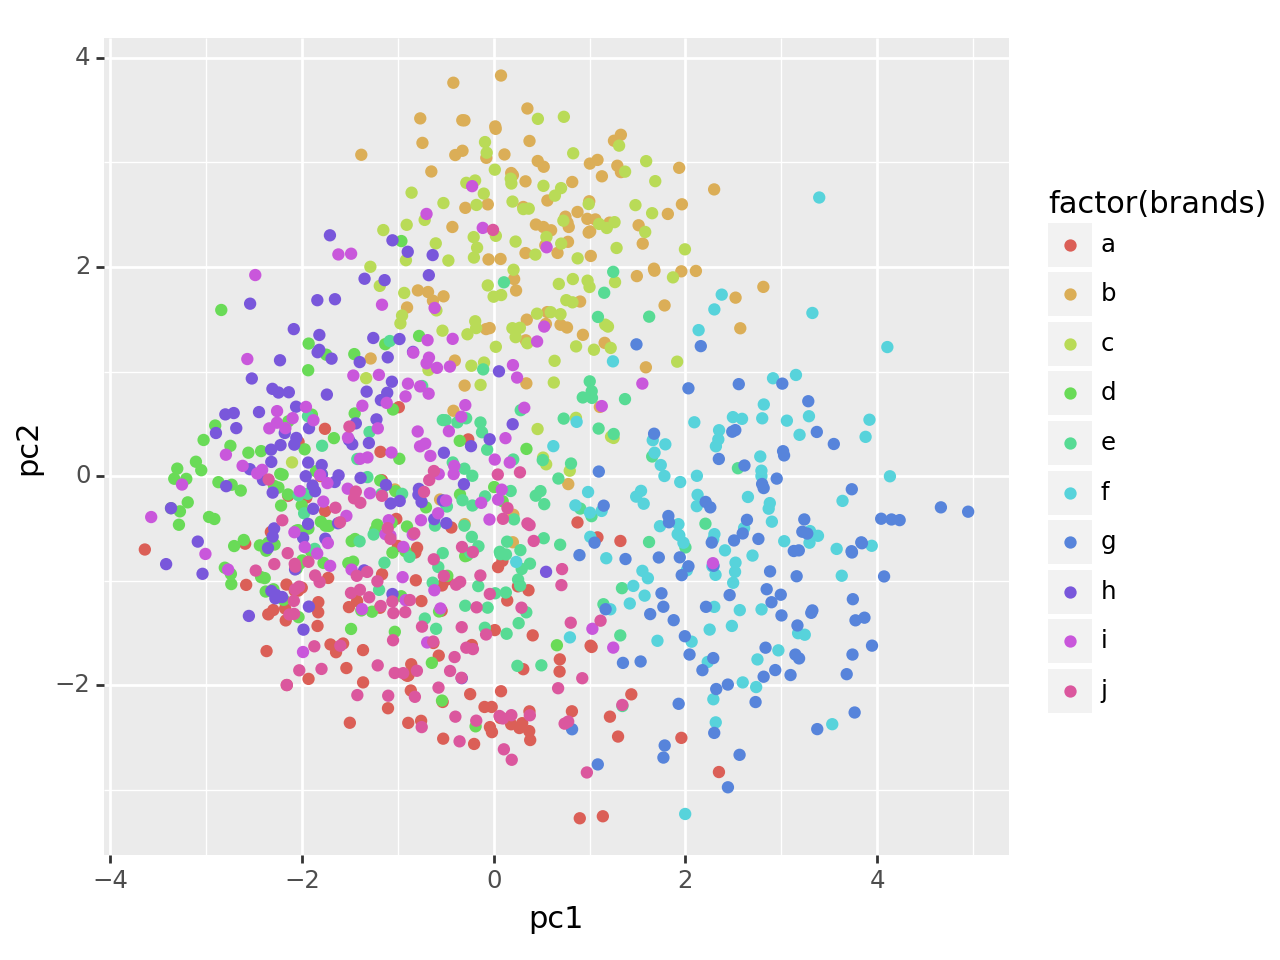

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(pca_df, aes(x = 'pc1', y = 'pc2', color = 'factor(brands)')) +
      geom_point()
)

From the above graph, you can observe that the brands, when projected to a two-dimensional space, can be linearly separable up to some extent.

Unsupervised learning is often much more challenging. The exercise tends to be more subjective, and there is no simple goal for the analysis, such as prediction of a response. Unsupervised learning is often performed as part of an exploratory data analysis.

Furthermore, it can be hard to assess the results obtained from unsupervised learning methods, since there is no universally accepted mechanism for performing cross-validation or validating results on an independent data set. The reason for this difference is simple. If we fit a predictive model using a supervised learning technique, then it is possible to check our work by seeing how well our model predicts the response Y on observations not used in fitting the model. However, in unsupervised learning, there is no way to check our work because we don't know the true answer — the problem is unsupervised.

# Data mining techniques





## Association Rule Mining

**Principles of Association Rule Mining**

The principles of association rule mining involve uncovering interesting and valuable patterns, relationships, or associations in large datasets. Association rule mining is commonly used in data mining and machine learning to discover relationships between items in transactional or relational data.

**Market Basket Model**

Market basket analysis is a data mining and analytical technique used in the field of business and retail to discover associations and patterns among products or items that are frequently purchased together by customers. This analysis helps businesses understand customer buying behavior, optimize product placements, and create more effective marketing and sales strategies. Market basket analysis is also known as affinity analysis, association analysis, or product association analysis.


**Key constructs:**

1. **Support:** Support measures the proportion of transactions that contain a particular itemset (a combination of items). It helps identify how frequently an itemset occurs in the dataset.

High support indicates that the itemset is frequently purchased and is a fundamental metric in association rule mining.


2. **Confidence:** Confidence measures the likelihood that an association rule is true. It calculates the probability that, if a customer buys item A, they will also buy item B.

High confidence suggests that the rule is more reliable and reflects a strong association between items.

3. **Lift:** Lift is a measure of how much more likely an association rule is true compared to what would be expected by chance. It helps assess the strength of the association between items.

  1. Lift > 1: Indicates a positive association. The presence of item A increases the likelihood of item B.
  2. Lift = 1: Suggests that there is no association between items A and B.
  3. Lift < 1: Indicates a negative association. The presence of item A decreases the likelihood of item B.

4. **Leverage:** Leverage measures the difference between the observed frequency of itemsets A and B occurring together and the expected frequency if they were independent. It helps identify whether there is a significant relationship between items.

Positive leverage indicates that the presence of both items is more significant than expected by chance, while negative leverage suggests that their co-occurrence is less frequent than expected.

5. Conviction: Conviction measures the likelihood that the rule is incorrect. It quantifies how much more likely the antecedent and consequent are independent of each other.

High conviction indicates that the rule is likely to be true, while low conviction suggests that it is unreliable.

**Analysis**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/retailsubset.csv')
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[lambda d: d.Country == "Germany"]

basket = (
    data
      .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('InvoiceNo')
        )

basket = basket.drop(columns = ["POSTAGE"])

In [ ]:
basket.columns

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)


frequent_itemsets = apriori(basket_sets, min_support = 0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.0)
rules = rules.sort_values(by="confidence", ascending=False)

In [ ]:
rules